# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [23]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [24]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [25]:
set(y)

{0, 1, 2}

In [26]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

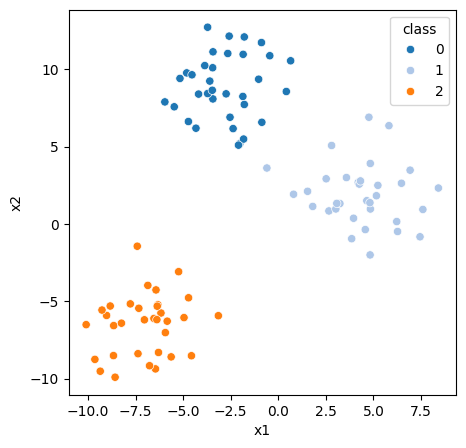

In [27]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [28]:
k = 3

# Step 1

idx = np.random.choice(len(X), k, replace=False)  
centroids = X[idx,:]
idx

array([ 7, 93,  1])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [29]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(X, centroids, 'euclidean')

distances[0:5]

array([[17.94040413, 21.71391694, 17.5780902 ],
       [ 3.7890106 ,  6.85763952,  0.        ],
       [10.65083287,  9.99035928, 14.36966912],
       [ 4.78595848,  7.36761044,  1.22716578],
       [13.37005979, 17.03465851, 13.50191154]])

## Step 3
Now assign each data point to the closest centroid

In [30]:
# Step 3
points = np.argmin(distances, axis=1)

points

array([2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [31]:
# Step 4
temp_centroids = []

for cluster in range(k):
    temp_cluster_centroid = X[points == cluster].mean(axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[-1.7472017 ,  0.58793131],
       [-1.90478398,  9.75991895],
       [-1.99853267, -5.25331379]])

# Step 5
Centroid change? Convergence

In [32]:
centroid_change = np.linalg.norm(centroids - temp_centroids)
centroid_change

14.211857058928514

In [33]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [44]:
def kmeans(X, k):
    # Step 1
    idx = np.random.choice(len(X), k, replace=False)  
    centroids = X[idx]  

    while True:
        # Step 2
        distances = cdist(X, centroids, 'euclidean')

        # Step 3
        points = np.argmin(distances, axis=1)

        # Step 4
        temp_centroids = []
        for cluster in range(k):
            temp_cluster_centroid = X[points == cluster].mean(axis=0)
            temp_centroids.append(temp_cluster_centroid)
        temp_centroids = np.array(temp_centroids)

        # Step 5
        if np.array_equal(centroids, temp_centroids):
            # Convergence
            return points, centroids
        else:
            centroids = temp_centroids


In [48]:
k = 10
points, centroids = kmeans(X, k)

In [49]:
centroids

array([[ 1.94388906,  8.67051434],
       [-2.07975035,  5.65172295],
       [-1.85492848,  8.4343174 ],
       [-1.50905429, 11.56058433],
       [-3.42149838, 11.04115398],
       [-6.14125054, -5.19124864],
       [ 3.46588782,  1.47757179],
       [ 6.39756132,  2.07146039],
       [-4.45985515,  8.51739448],
       [-7.96149238, -7.83346614]])

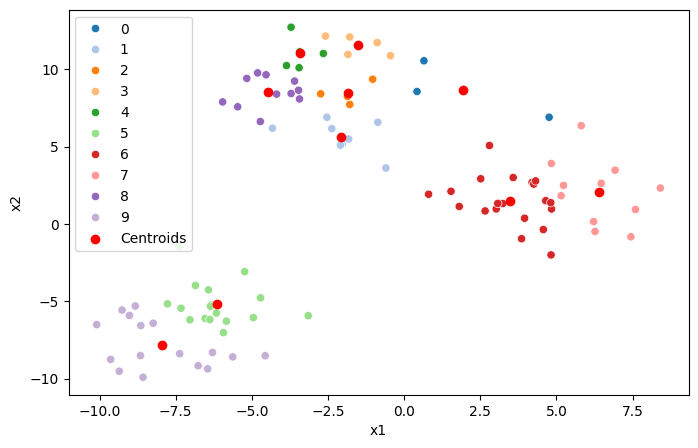

In [50]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [38]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [39]:
print("Points: ", kmeans.labels_)
# print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [40]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.773515175247
Score:  -2361.7735151752468


In [41]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

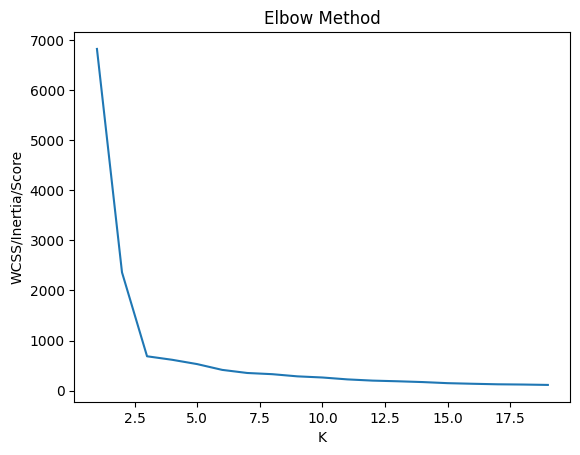

In [42]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()